In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import copy
from itertools import product

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df_1= pd.read_csv("/content/drive/MyDrive/Satellite Images/Ban Sagar_Kmeans_Cluster_river.csv")
df_2= pd.read_csv("/content/drive/MyDrive/3rd-Year-Project/NDWI/CODE/K_Means_Cluster.csv")


In [20]:
df_2

,Unnamed: 0,Unnamed: 0.1,Pixel-X,Pixel-Y,Green,Red,Nir,Swir1,Swir2,NDVI_nir,NDVI_swir1,NDVI_swir2,Turbidity,Water_ratio_index,Cluster
0,0,0,941,3053,9327.0,9047.0,9254.0,8752.0,8451.0,0.003929,0.031805,0.049274,0.015239,1.020438,0
1,1,1,941,3054,9253.0,8818.0,8766.0,8079.0,7991.0,0.027027,0.067736,0.073185,0.024072,1.072781,0
2,2,2,941,3055,9163.0,8627.0,8556.0,8462.0,8154.0,0.034257,0.039773,0.058266,0.030129,1.045364,0
3,3,3,941,3056,9121.0,8586.0,8537.0,8478.0,8117.0,0.033073,0.036536,0.058243,0.030214,1.040670,0
4,4,4,941,3057,9140.0,8623.0,8721.0,8208.0,7925.0,0.023459,0.053724,0.071198,0.029105,1.049265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625595,625595,625595,7407,6179,12756.0,12443.0,12750.0,12317.0,11212.0,0.000235,0.017509,0.064419,0.012421,1.005266,0
625596,625596,625596,7407,6180,12665.0,12467.0,12653.0,12167.0,11222.0,0.000474,0.020055,0.060409,0.007878,1.012571,0
625597,625597,625597,7407,6186,12214.0,12047.0,12604.0,12080.0,11127.0,-0.015714,0.005516,0.046570,0.006883,0.982863,0
625598,625598,625598,7407,6187,12043.0,11679.0,12197.0,11876.0,10831.0,-0.006353,0.006982,0.052986,0.015344,0.985419,0


In [15]:
img_arr = np.zeros((7691,7521))
img_arr_2 = np.zeros((7691,7521))

In [16]:
for i in range(len(df_1['Pixel-X'])):
  if df_1['Cluster'][i] == 1:
    img_arr[int(df_1['Pixel-X'][i])][int(df_1['Pixel-Y'][i])] = 200
  if df_1['Cluster'][i] == 0:
    img_arr[int(df_1['Pixel-X'][i])][int(df_1['Pixel-Y'][i])] = 300

In [21]:
for i in range(len(df_2['Pixel-X'])):
  if df_2['Cluster'][i] == 1:
    img_arr_2[int(df_2['Pixel-X'][i])][int(df_2['Pixel-Y'][i])] = 200
  if df_2['Cluster'][i] == 0:
    img_arr_2[int(df_2['Pixel-X'][i])][int(df_2['Pixel-Y'][i])] = 300

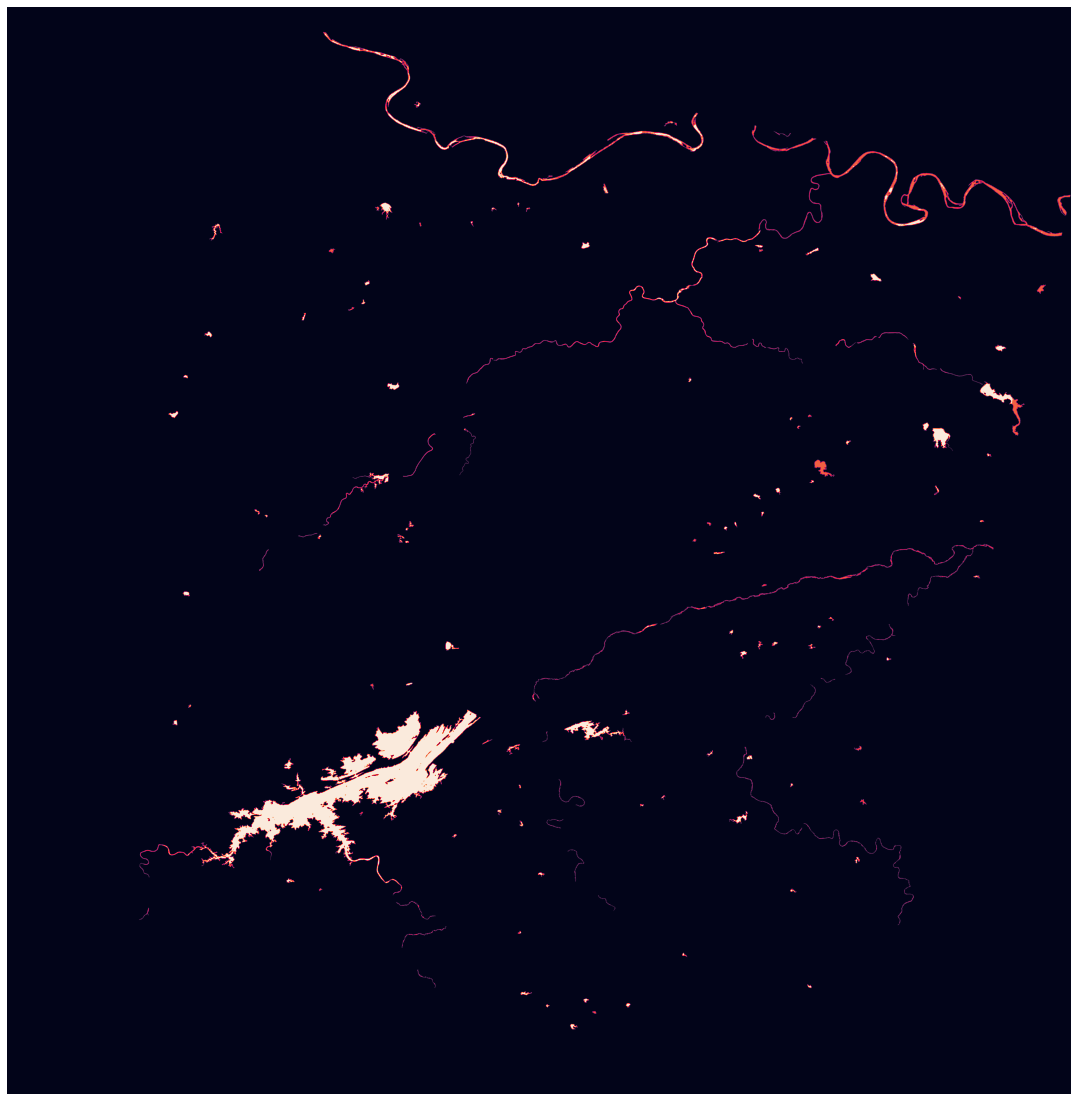

In [22]:
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(img_arr)
# cv2.imwrite("cluster_arr.png", img_arr)


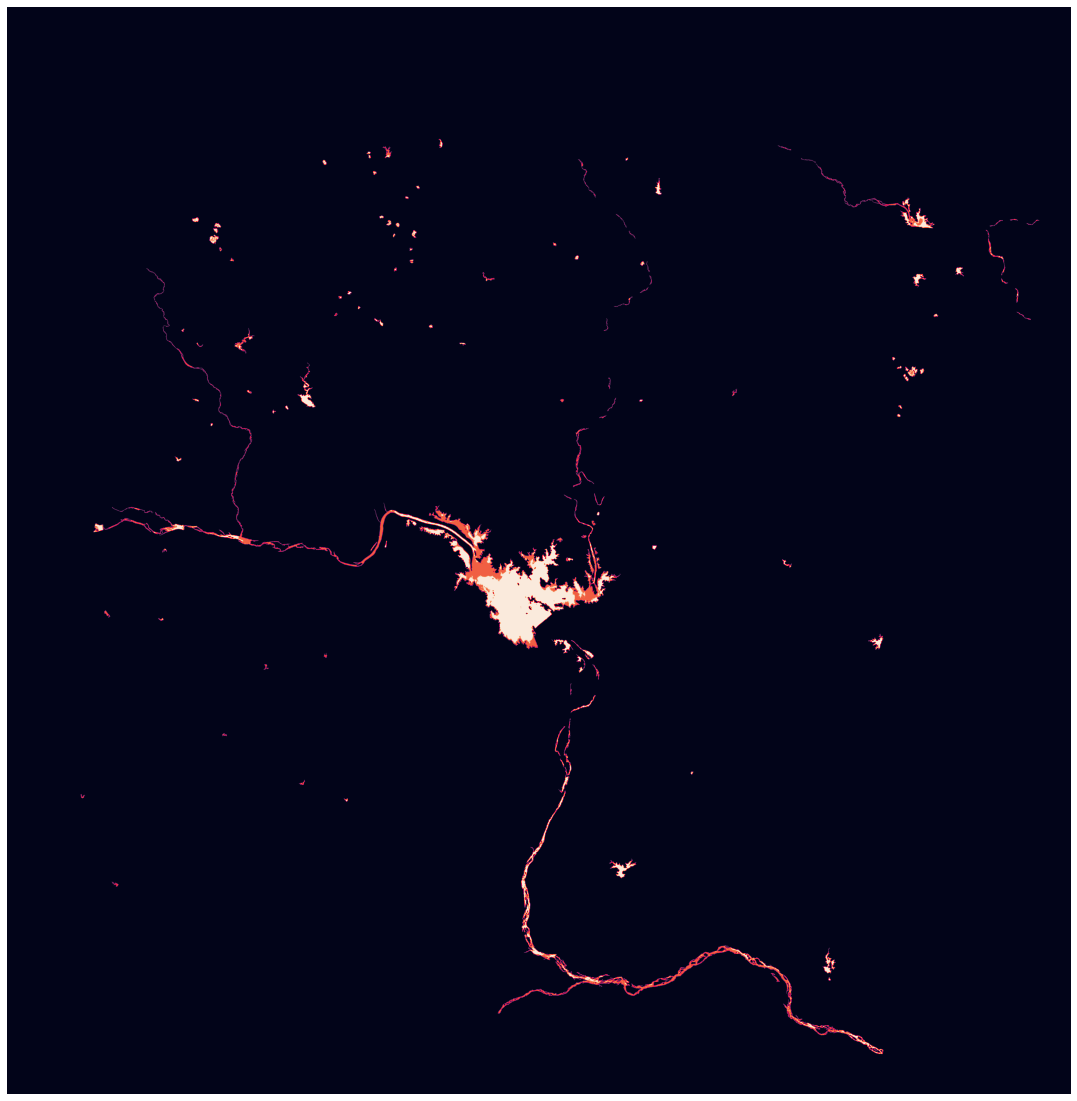

In [23]:
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(img_arr_2)